# Lending Club Prediction Project

## Exploratory Data Analysis (EDA)

## Loading Libraries for Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import re
from datetime import datetime
import calendar
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


## Exploratory Data Analysis


#### Loading, Cleaning and Reviewing the Dataset


In [2]:
# Path to dataset
database_path = 'https://raw.githubusercontent.com/sumkh/Lending_Club_ITI105_Project/main/datasets/lc_dataset.csv'

# Load dataset
data = pd.read_csv(database_path, index_col = 'id')

# View data
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
id,,,,,,,,,,,,,,,,,,,,,
T0,25000.0,60 months,14.83,592.52,D,D3,NaN,10+ years,RENT,109000.0,...,0.0,6390.0,41.5,39.0,f,INDIVIDUAL,NaN,0.0,Unit 8329 Box 0376\nDPO AA 93700,Charged Off
T1,9500.0,36 months,12.99,320.05,C,C2,NaN,NaN,MORTGAGE,40000.0,...,1.0,62512.0,82.6,20.0,f,INDIVIDUAL,2.0,1.0,"3275 West Club Suite 454\nWest Kyle, SC 48052",Charged Off
T2,9000.0,36 months,8.39,283.65,B,B1,Bus Operator,10+ years,MORTGAGE,50000.0,...,0.0,8835.0,23.2,20.0,w,INDIVIDUAL,2.0,0.0,"16698 Kline Unions\nNorth Patrickfurt, VA 05113",Fully Paid
T3,16700.0,60 months,22.99,470.69,F,F1,Business Analyst,7 years,MORTGAGE,68000.0,...,0.0,23489.0,55.3,26.0,f,INDIVIDUAL,2.0,0.0,"931 Kimberly Passage Suite 749\nDuncanfurt, NM...",Fully Paid
T4,2800.0,36 months,15.80,98.17,C,C3,BUDCO,9 years,MORTGAGE,218554.0,...,0.0,33014.0,90.7,44.0,w,INDIVIDUAL,7.0,0.0,"657 Monroe Row Suite 128\nPort Courtney, ND 00813",Fully Paid


In [3]:
# Reviewing data columns against the data dictionary
# to develop a preli,inary understanding of the data and
# note the columns with missing va;ues.
data.info()

# Count of missing values for variables with missing values
for col in data.columns:
  if data[col].isnull().sum() > 0:
    print(f'{col} has {data[col].isnull().sum()} missing values')

<class 'pandas.core.frame.DataFrame'>
Index: 316824 entries, T0 to T316823
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             316824 non-null  float64
 1   term                  316824 non-null  object 
 2   int_rate              316824 non-null  float64
 3   installment           316824 non-null  float64
 4   grade                 316824 non-null  object 
 5   sub_grade             316824 non-null  object 
 6   emp_title             298514 non-null  object 
 7   emp_length            302162 non-null  object 
 8   home_ownership        316824 non-null  object 
 9   annual_inc            316824 non-null  float64
 10  verification_status   316824 non-null  object 
 11  issue_d               316824 non-null  object 
 12  purpose               316824 non-null  object 
 13  title                 315423 non-null  object 
 14  dti                   316824 non-null  float64
 15  ear

The dataset contains a total of 316,824 entries, each with 27 attributes related to personal loans issued through the Lending Club platform. These attributes include both numerical and categorical data types and can be categorised into the following groups:

### Loan and Payment Information
- **loan_amnt**: Total amount of the loan applied for by the borrower. (No missing values)
- **term**: The number of payments on the loan, specified in months. (No missing values)
- **int_rate**: Interest rate on the loan. (No missing values)
- **installment**: Monthly payment owed by the borrower if the loan originates. (No missing values)

### Loan Grading
- **grade**: Lending Club assigned loan grade. (No missing values)
- **sub_grade**: Lending Club assigned loan subgrade. (No missing values)

### Ownership and Income
- **home_ownership**: The home ownership status provided by the borrower. (No missing values)
- **annual_inc**: The self-reported annual income provided by the borrower. (No missing values)

### Loan Issuance and Verification
- **issue_d**: The month which the loan was funded. (No missing values)
- **verification_status**: Indicates if income was verified by Lending Club, not verified, or if the income source was verified. (No missing values)

### Loan Purpose and Status
- **purpose**: A category provided by the borrower for the loan request. (No missing values)
- **loan_status**: Current status of the loan. (No missing values)

### Credit History
- **earliest_cr_line**: The month the borrower's earliest reported credit line was opened. (No missing values)
- **open_acc**: The number of open credit lines in the borrower's credit file. (No missing values)
- **pub_rec**: Number of derogatory public records. (No missing values)
- **revol_bal**: Total credit revolving balance. (No missing values)
- **total_acc**: The total number of credit lines currently in the borrower's credit file. (No missing values)

### Additional Loan Information
- **initial_list_status**: The initial listing status of the loan. Possible values are – W, F. (No missing values)
- **application_type**: Indicates whether the loan is an individual or joint application. (No missing values)
- **address**: Home address of the borrower. (No missing values)

### Variables with Missing Values, which are more sensitive information about the borrowers
- **emp_title**: Job title supplied by the borrower. (18,310 missing values)
- **emp_length**: Employment length in years. (14,662 missing values)
- **title**: The loan title provided by the borrower. (1,401 missing values)
- **revol_util**: Revolving line utilization rate. (226 missing values)
- **mort_acc**: Number of mortgage accounts. (30,213 missing values)
- **pub_rec_bankruptcies**: Number of public record bankruptcies. (436 missing values)

#### Target Variable: loan_status

loan_status
Fully Paid     0.80343
Charged Off    0.19657
Name: proportion, dtype: float64
loan_status
Fully Paid     254546
Charged Off     62278
Name: count, dtype: int64


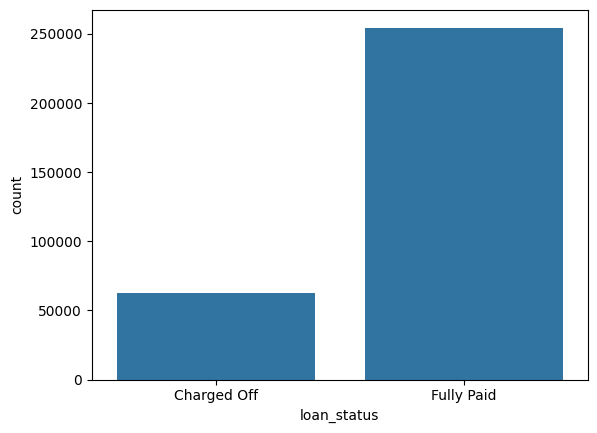

In [4]:
# Count values for loan_status and its proportion
print(data['loan_status'].value_counts(normalize=True))
print(data['loan_status'].value_counts())

# Plot countplot for loan_status
sns.countplot(x='loan_status', data=data)
plt.show()

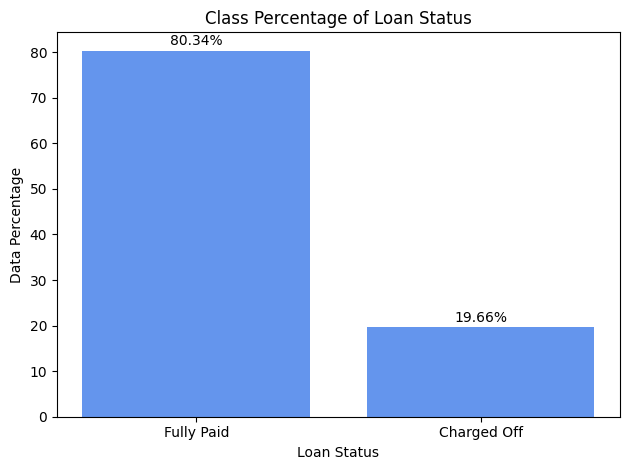

In [5]:
# Calculating class percentages

class_percentage = round(data.loan_status.value_counts(normalize = True) * 100, 2)

#plt.figure(figsize = (8, 5))
bars = plt.bar(class_percentage.index, class_percentage, color = 'cornflowerblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha = 'center', va = 'bottom', color = 'black')

plt.xlabel('Loan Status')
plt.ylabel('Data Percentage')
plt.title('Class Percentage of Loan Status')

plt.xticks(class_percentage.index)

plt.tight_layout()
plt.show()

The target variable in this dataset is `loan_status`, which categorizes the loans into two states: "Fully Paid" and "Charged Off". Based on the visual and numerical summary:

- **Fully Paid**: Represents loans that have been paid back in full. Approximately 80.34% of the loans fall into this category, amounting to 254,546 loans.
- **Charged Off**: Represents loans where the borrower has defaulted or failed to pay back the loan, comprising about 19.65% of the dataset, with 62,278 loans in this state.

### Insights from the Distribution:

1. **Imbalance in Classes**: There is a significant class imbalance with a majority of the loans being fully paid. This imbalance can impact the performance of machine learning models, potentially leading them to be biased towards predicting the majority class ("Fully Paid").

2. **Impact on Model Training**: Due to the skewed distribution, models might need techniques like resampling, use of balanced class weights, or specialized algorithms for imbalanced data to better predict the minority class ("Charged Off").

3. **Risk Assessment**: The proportion of loans that are charged off (nearly 20%) is substantial from a risk assessment and financial loss standpoint, suggesting that it is crucial to identify factors that might predict or contribute to a loan being charged off.

4. **Data Utility**: The distinct separation in loan statuses makes this a good candidate for binary classification tasks, with goal to predict whether new borrowers will fully repay the loan or default on it.

To effectively leverage this dataset for predictive modeling, addressing the class imbalance and incorporating techniques to enhance model sensitivity towards detecting "Charged Off" loans would be crucial steps.

In [6]:
# Convert 'loan_status' to boolean where 'Fully Paid' is 0 and 'Charged Off' is 1
data['loan_charged_off'] = data['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

#### Provided *Features* about the Loans

In [7]:
# Extract the digits months from 'term'
data['n_term'] = data['term'].str.extract(r'(\d+)').astype(int)

# New Feature: Total Instalment Payment
data['total_installment'] = data['installment'] * data['n_term']

# New Feature: Total Interest
data['total_interest'] = data['total_installment'] - data['loan_amnt']

In [8]:
# Descriptive Statistics for 'loan_amnt', 'int_rate', 'installment'
data[['loan_amnt', 'total_installment', 'total_interest', 'int_rate', 'installment', 'n_term']].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,316824.0,14113.539142,8364.688354,500.00,8000.0000,12000.00,20000.00,40000.00
total_installment,316824.0,18402.886133,12060.820170,578.88,9313.5600,15368.04,24663.96,77634.00
total_interest,316824.0,4289.346992,4461.864226,-19406.68,1441.8400,2583.20,5467.88,37634.00
int_rate,316824.0,13.639144,4.473150,5.32,10.4900,13.33,16.55,30.99
installment,316824.0,431.816296,250.839629,16.08,250.3275,375.43,567.11,1533.81
n_term,316824.0,41.696765,10.211247,36.00,36.0000,36.00,36.00,60.00


### Insights from Each Variable

1. **loan_amnt**
   - **Mean**: 14,113.54, indicating a moderate average loan amount.

   - **Range**: 500 to 40,000, showing a wide range of loan amounts from small to quite substantial.

2. **total_installment**
   - **Mean**: 18,402.89, suggesting that on average, borrowers pay this total amount over the life of the loan.

   - **Range**: 578.88 to 77,634, reflecting both short-term smaller loans and long-term larger loans.

3. **total_interest**
   - **Mean**: 4,289.35, average total interest paid.

   - **Range**: -19,406.68 (a negative value suggesting errors or adjustments) to 37,634, indicating significant variation in interest costs, possibly reflecting differences in loan amounts, terms, or rates.

4. **int_rate**
   - **Mean**: 13.64%, which is a relatively high average interest rate, possibly reflecting unsecured personal loans.

   - **Range**: 5.32% to 30.99%, showing a broad spectrum of interest rates, likely influenced by the borrower's creditworthiness and loan terms.

5. **installment**
   - **Mean**: 431.82, average monthly payment.

   - **Range**: 16.08 to $1,533.81, indicating variability in loan size and term.

6. **n_term**
   - **Mean**: 41.70 months, suggesting many loans extend slightly beyond the typical 36 or 60 months.

   - **Range**: 36 to 60 months, confirming that most loans are structured around these two standard terms.

### Data Considerations

The negative minimum value for total interest suggests possible data entry errors or adjustments that might need addressing. The high variability in interest rates and installment amounts reflects the diversity of borrowers' credit situations and the types of loans issued.

In [9]:
# Filter the records where 'total_interest' is less than or equal to zero
neg_interest = data[data['total_interest'] <= 0]
neg_interest.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status,loan_charged_off,n_term,total_installment,total_interest
id,,,,,,,,,,,,,,,,,,,,,
T336,10000.0,60 months,11.49,156.67,B,B4,State of Connecticut,10+ years,MORTGAGE,130000.0,...,f,INDIVIDUAL,NaN,0.0,554 Strickland Crescent Apt. 978\nSouth Raymon...,Fully Paid,0,60,9400.2,-599.8
T528,20000.0,36 months,6.54,404.05,A,A4,"Axsys Technologies, General Dynamics AIS",3 years,MORTGAGE,76000.0,...,f,INDIVIDUAL,NaN,0.0,96063 Katherine Trail Suite 881\nEast Victoria...,Fully Paid,0,36,14545.8,-5454.2
T2057,18000.0,60 months,13.23,260.16,C,C1,McDonough District Hospital,4 years,MORTGAGE,68000.0,...,f,INDIVIDUAL,NaN,0.0,"6852 David Lakes\nPort Thomasbury, WV 29597",Fully Paid,0,60,15609.6,-2390.4
T2078,26375.0,60 months,18.79,435.80,E,E3,The Trump Network,2 years,MORTGAGE,110000.0,...,f,INDIVIDUAL,NaN,0.0,"55633 Boone Mission Suite 519\nDawnport, ND 30723",Charged Off,1,60,26148.0,-227.0
T2527,17875.0,60 months,12.99,276.96,C,C1,NYCTA,10+ years,RENT,39672.0,...,f,INDIVIDUAL,NaN,0.0,"275 Murray Centers\nSouth William, ME 70466",Fully Paid,0,60,16617.6,-1257.4


In [10]:
# # Descriptive Statistics for 'loan_amnt', 'int_rate', 'installment'
neg_interest[['loan_amnt', 'total_installment', 'total_interest', 'int_rate', 'installment', 'n_term']].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,868.0,18108.266129,7677.929774,2000.00,12000.0000,18000.000,24062.5000,35000.00
total_installment,868.0,15007.012673,7524.551222,1220.04,8904.6000,14140.740,20006.2800,34912.80
total_interest,868.0,-3101.253456,2510.331785,-19406.68,-4160.9500,-2698.700,-1303.6000,-1.56
int_rate,868.0,10.852961,3.755470,5.42,6.9100,10.790,12.9900,22.35
installment,868.0,309.622039,137.082871,33.89,206.1975,295.205,388.6725,904.17
n_term,868.0,48.138249,12.006122,36.00,36.0000,60.000,60.0000,60.00


There are a total of 868 loan records where the `total_interest` is less than or equal to zero, indicating potential anomalies in the data:

### 1. Negative or Zero Interest Values
- **Explanation**: `total_interest` should represent the interest paid over the loan term above the principal amount. Negative or zero values might indicate data entry errors, calculation mistakes, or atypical financial adjustments that deviate from standard loan agreements.

### 2. Loan Details
- **Interest Rates**: Range from 5.42% to 22.35%, covering both low and high-risk categories.
- **Loan Amounts**: Vary significantly from 2,000 to 35,000 with Mean of 18,108.27, suggesting a relatively high average loan amount among these anomalies.
- **Terms**: Mostly 60 months, with some loans as short as 36 months.
- **Loan Grades**: Span from A to E, indicating a wide variety of loan types and borrower profiles.
- **Monthly Installment (installment)**: Range from 33.89 to 904.17 and Mean 309.62, indicating variability in monthly payments.

### 3. Potential Causes for Negative Interest
- **Early Repayment and Overpayments**: Payments that exceed scheduled amounts could result in negative calculations, especially if fees or adjustments are not correctly applied.
- **Data Errors**: Mistakes in recording payments, interest rates, or principal amounts.
- **Adjustments or Refunds**: Situations where financial institutions refund interest or fees due to overcharges, errors, or settlements.

### 4. Implications for Analysis
- **Data Cleaning Needs**: Records exhibiting negative or zero total interest require careful examination and may need correction or exclusion from typical financial analyses to prevent skewed results.
- **Risk Assessment and Management**: It’s crucial to discern the nature of these anomalies, as they could affect data quality and influence financial forecasting or risk modeling.

Observed that there are 868 records where the total payment based on term multiply by monthly instalment is less than intial loan amount, either the loan amount or the instalment is erronous. As the 868 records is not significant to the entire dataset of 316,824 records, I proceed to remove these erronous records.

In [11]:
# Remove row where total interest is less than or equal to zero
data = data[data['total_interest'] > 0]

#### Analyse Correlation of Loan's Features

In [12]:
# New Feature: Number of monthly installment to repay the loan amount assuming no interest component.
data['n_installmt'] = data['loan_amnt'] / data['installment']

<ipython-input-12-52601b971fdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['n_installmt'] = data['loan_amnt'] / data['installment']


In [13]:
# Descriptive Statistics for Loan Features
data[['loan_amnt', 'total_installment', 'n_installmt', 'total_interest','int_rate','installment', 'n_term']].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,315956.0,14102.564756,8363.880971,500.000000,7975.00000,12000.00000,20000.000000,40000.0000
total_installment,315956.0,18412.215338,12069.625945,578.880000,9313.56000,15380.28000,24679.800000,77634.0000
n_installmt,315956.0,32.410925,5.038847,23.258058,29.22087,30.54912,32.856009,59.9988
total_interest,315956.0,4309.650582,4449.175646,0.600000,1450.92000,2587.40000,5476.200000,37634.0000
int_rate,315956.0,13.646798,4.472578,5.320000,10.49000,13.33000,16.550000,30.9900
installment,315956.0,432.151991,250.999358,16.080000,250.33000,375.49000,567.820000,1533.8100
n_term,315956.0,41.679069,10.200302,36.000000,36.00000,36.00000,36.000000,60.0000


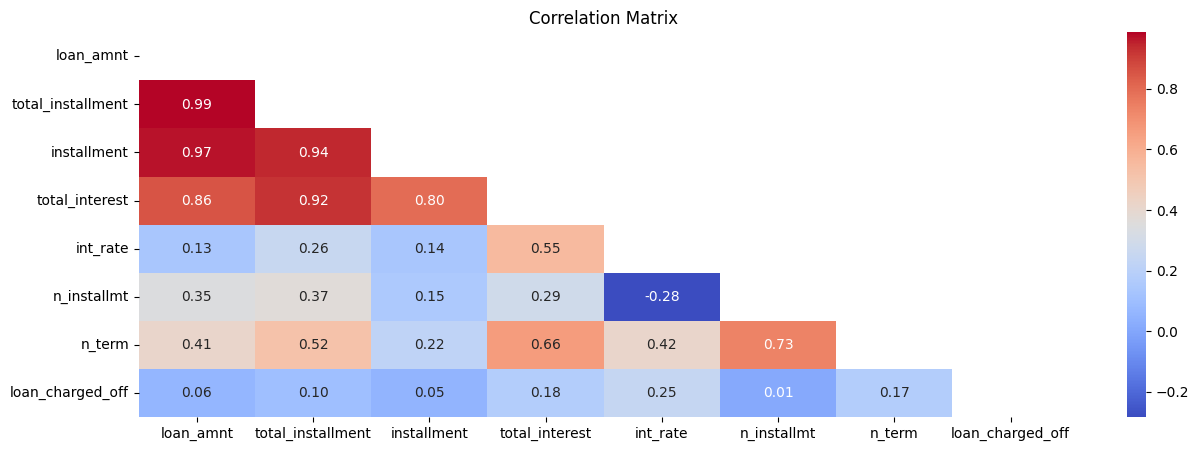

In [14]:
# Plotting Correlation Analysis Heatmaps
# Correlation matrix for loan profile
data_num = data[['loan_amnt','total_installment', 'installment',
            'total_interest', 'int_rate', 'n_installmt',
            'n_term', 'loan_charged_off']]


plt.figure(figsize=(15, 5))
corr_matrix = data_num.corr(method='spearman')  # Exclude target from correlation matrix calculation

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()


In [15]:
from scipy.stats import spearmanr

# Compute Spearman correlations with Target Variable
data_var = ['loan_amnt','total_installment', 'installment',
            'total_interest', 'int_rate', 'n_installmt',
            'n_term']

# Test_significance
significance_results = {}

for feature in data_var:
  corr, p_value = spearmanr(data[feature], data['loan_status'])
  significance_results[feature] = {'Correlation': corr, 'Absolute Correlation': abs(corr), 'P-value': p_value, 'Is Correlated': p_value < 0.025} # alpha 5% /2


significance_results_df = pd.DataFrame(significance_results).T
significance_results_df.sort_values(by='Absolute Correlation', ascending=False, inplace=True)
significance_results_df

,Correlation,Absolute Correlation,P-value,Is Correlated
int_rate,-0.245425,0.245425,0.0,True
total_interest,-0.175635,0.175635,0.0,True
n_term,-0.17304,0.17304,0.0,True
total_installment,-0.100108,0.100108,0.0,True
loan_amnt,-0.062536,0.062536,0.0,True
installment,-0.04921,0.04921,0.0,True
n_installmt,-0.009645,0.009645,0.0,True


The correlation analysis offers insightful details on how different loan-related variables interact with each other and with the target variable `loan_status`:

1. **High Correlations**:
   - **`loan_amnt`, `installment`, `total_interest` and `total_installment`**: Very high correlation, which is expected as higher loan amounts typically require higher total payments (or installment) and interest over the loan term.

2. **Moderate to High Correlations**:
   - **`int_rate` and `total_interest`**: Correlation of 0.55, showing that higher interest rates generally lead to higher total interest paid, although this relationship isn't as strong as some others.
   - **`n_term` and several financial variables** (`total_installment`, `total_interest`, and `installment`): These correlations (0.52 to 0.73) suggest longer terms generally involve larger amounts financed and paid, including interest.

3. **Low Correlations with `loan_charged_off`**:
   - Variables like `loan_amnt`, `total_installment`, and `installment` have very low correlations with `loan_charged_off` (0.06 to 0.10), indicating that the amount and structure of the loan are not strong predictors of whether a loan will default.

### Spearman Correlation with `loan_status`

- The correlations of various loan features with the `loan_status` provide insights into how these features might influence loan outcomes:
   - **`int_rate`**: Shows a correlation of 0.245, indicating higher interest rates might be associated with a higher likelihood of a loan being charged off.
   - **`total_interest` and `n_term`**: Also show correlations (0.176 and 0.173, respectively), suggesting loans with higher total interest or longer terms are more likely to default.
   - **`total_installment` and `loan_amnt`**: Display weaker correlations with `loan_status`, reflecting that while higher loan amounts and installments impact loan outcomes, they are less predictive than interest rates or loan terms.

### Feature Selection Implications

For machine learning purposes, features with higher absolute correlations to `loan_status` might be prioritized to improve model accuracy.

Overall, the analysis underscores the importance of considering both individual loan amounts and terms, as well as the costs associated with these loans (like interest), in predicting loan performance. The low correlations of loan amounts and installments with charge-offs suggest that while the size of the loan matters, the terms and rates play a more critical role in determining the likelihood of default.

Upon considerating and comparing the created new features against the original features on correlation with the Target Variable `loan_status`, the decision is to **drop** `installment`, `total_instalment` and `loan_amnt`**.

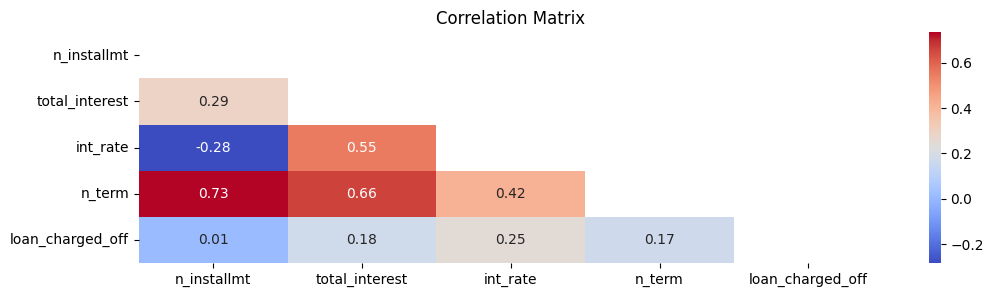

In [16]:
# Plotting Correlation Analysis Heatmaps
# Correlation matrix for loan profile
data_num = data[['n_installmt',
            'total_interest', 'int_rate',
            'n_term', 'loan_charged_off']]


plt.figure(figsize=(12, 3))
corr_matrix = data_num.corr(method='spearman')  # Exclude target from correlation matrix calculation

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Drop features are are hightly correlated
data = data.drop(['installment', 'total_installment','loan_amnt'], axis=1)

#### Analyse Loan Profile against LC assigned Loan Grade 'grade'

In [18]:
# Ordinal encode 'grade' according to set order
grade_unique = [x for x in data['grade'].unique()]
grade_unique.sort()

ordinal_encoder = OrdinalEncoder(categories = [grade_unique])
data['grade_enc'] = ordinal_encoder.fit_transform(data[['grade']])

# For 'sub_grade' extract only the digit
# Ensure 'sub_grade' is of type string before using .str accessor
data['sub_grade'] = data['sub_grade'].astype(str).str.extract(r'(\d+)')  # Convert to string
data['sub_grade'] = data['sub_grade'].astype(int)

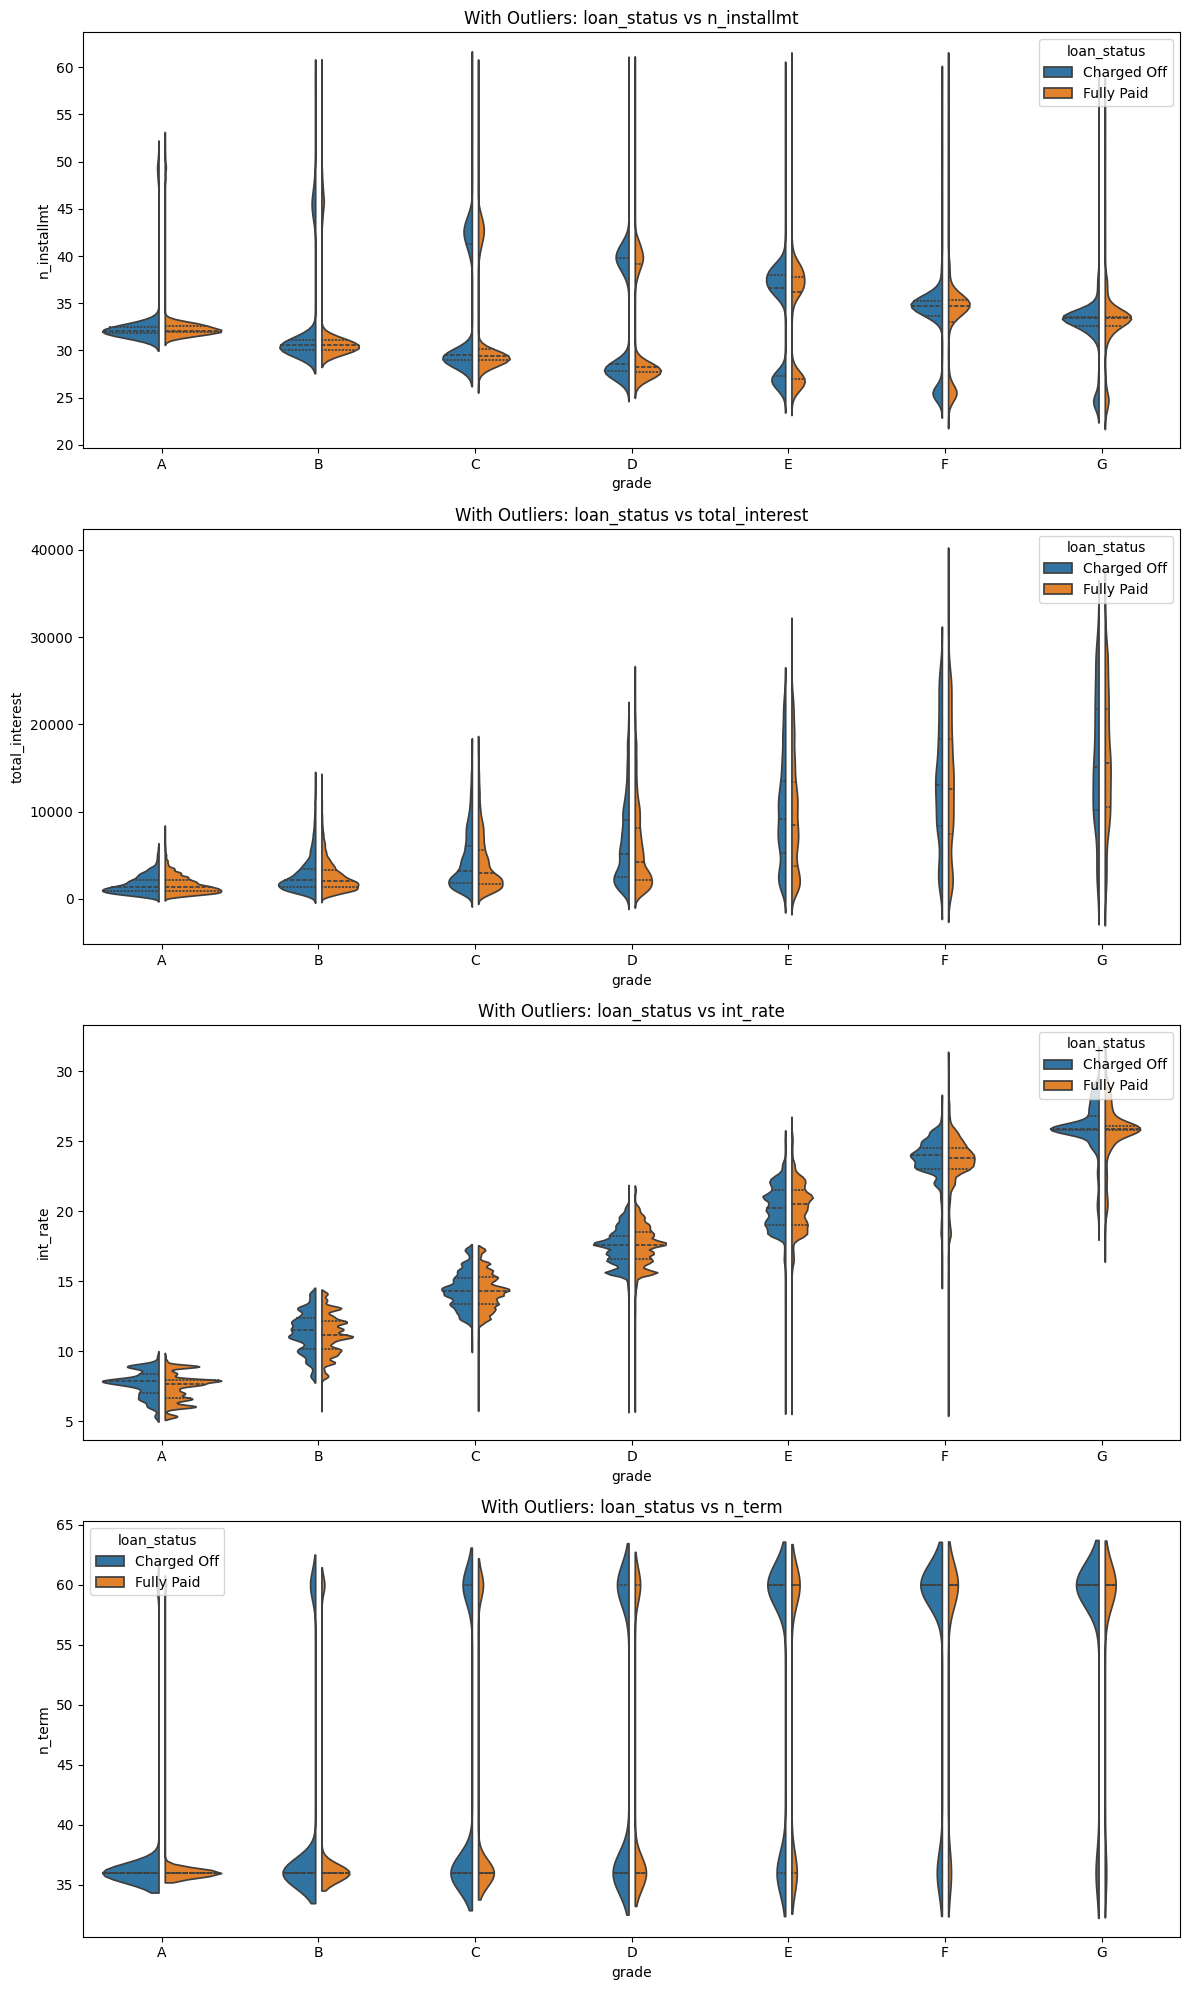

In [19]:
# Plot Violin Plots for each variable individually
def plot_violin_plots(df, num_cols, x_category = 'grade', category ='loan_status'):
  num_features = len(num_cols)
  num_rows = num_features  # Calculate the number of rows needed
  fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(12, num_rows * 5))  # Adjust figure size accordingly
  axes = axes.flatten()
  order_list = [x for x in data[x_category].unique()]
  order_list.sort()

  i = 0  # Initialize index for axes
  for col in df.columns:
      if df[col].dtype == 'object' and col == category:
          for num in num_cols:

              # Plot with outliers
              sns.violinplot(x=df[x_category], y=df[num], ax=axes[i], hue=df[category], split=True, gap=.1, inner="quart", order= order_list)
              axes[i].set_title(f'With Outliers: {col} vs {num}')
              i += 1

  # Adjust layout and display
  plt.tight_layout()
  plt.show()

loan_var = ['n_installmt',
            'total_interest', 'int_rate',
            'n_term']
plot_violin_plots(data, loan_var, x_category = 'grade', category ='loan_status')


The violin plots offer an insightful visual representation of how various loan characteristics distribute across different loan grades (`A` to `G`) and how these characteristics correlate with the loan status (`Charged Off` vs `Fully Paid`):

1. **Number of Installments (`n_installmt`)**:
   - Generally, lower-grade loans (grades `E` to `G`) show a broader range and higher median values for the number of installments, suggesting longer terms or smaller monthly payments. This could be due to higher principal amounts or extended repayment terms typically associated with higher risk loans.
   - The distribution for `Charged Off` loans tends to be wider across all grades, indicating variability in the number of installments that could be linked to defaults.

2. **Total Interest (`total_interest`)**:
   - The amount of total interest paid increases with lower loan grades, peaking at grades `D` and `E`. This is consistent with higher interest rates charged for higher risk categories.
   - `Charged Off` loans generally show lower total interest across higher-risk grades (D to G), possibly due to loans defaulting before accruing the expected total interest.

3. **Interest Rate (`int_rate`)**:
   - There is a clear upward trend in interest rates as loan grades decrease from `A` to `G`, illustrating the higher risk and therefore higher rates associated with lower-grade loans.
   - The overlap in distributions between `Charged Off` and `Fully Paid` loans within each grade indicates that while interest rates are higher in lower grades, they alone do not predict loan default.

4. **Loan Term (`n_term`)**:
   - Higher-grade loans (A to C) predominantly have shorter terms, while lower grades often feature longer terms, evidenced by broader distributions and higher median values in grades `F` and `G`.
   - Longer terms in lower-grade loans may reflect structured repayment plans intended to manage risk by reducing monthly payments, although this also results in greater overall interest accumulation.

### Implications for Risk Management and Lending Strategy

- **Risk Assessment**: The data clearly shows that lower-grade loans carry higher interest rates and often longer terms, which are risk mitigation strategies by lenders. However, these features also correlate with a higher incidence of charge-offs.
  
- **Loan Structuring**: Lenders might consider adjusting loan terms or installment structures to balance the risk and borrower affordability, particularly in lower grades.

- **Monitoring and Intervention**: Loans in lower grades that exhibit higher interest rates and longer terms should be closely monitored for early signs of financial distress. Proactive interventions could help in managing potential defaults.

- **Pricing Strategy**: The evident risk associated with lower-grade loans could justify the higher interest rates, but this also necessitates a balanced approach to ensure these rates do not themselves become a default risk factor.
  
- **Customer Segmentation**: Tailoring loan products to different customer segments based on their risk profile and historical performance of similar segments could optimize outcomes.

#### Box Plots of Loan Features vs Loan Status

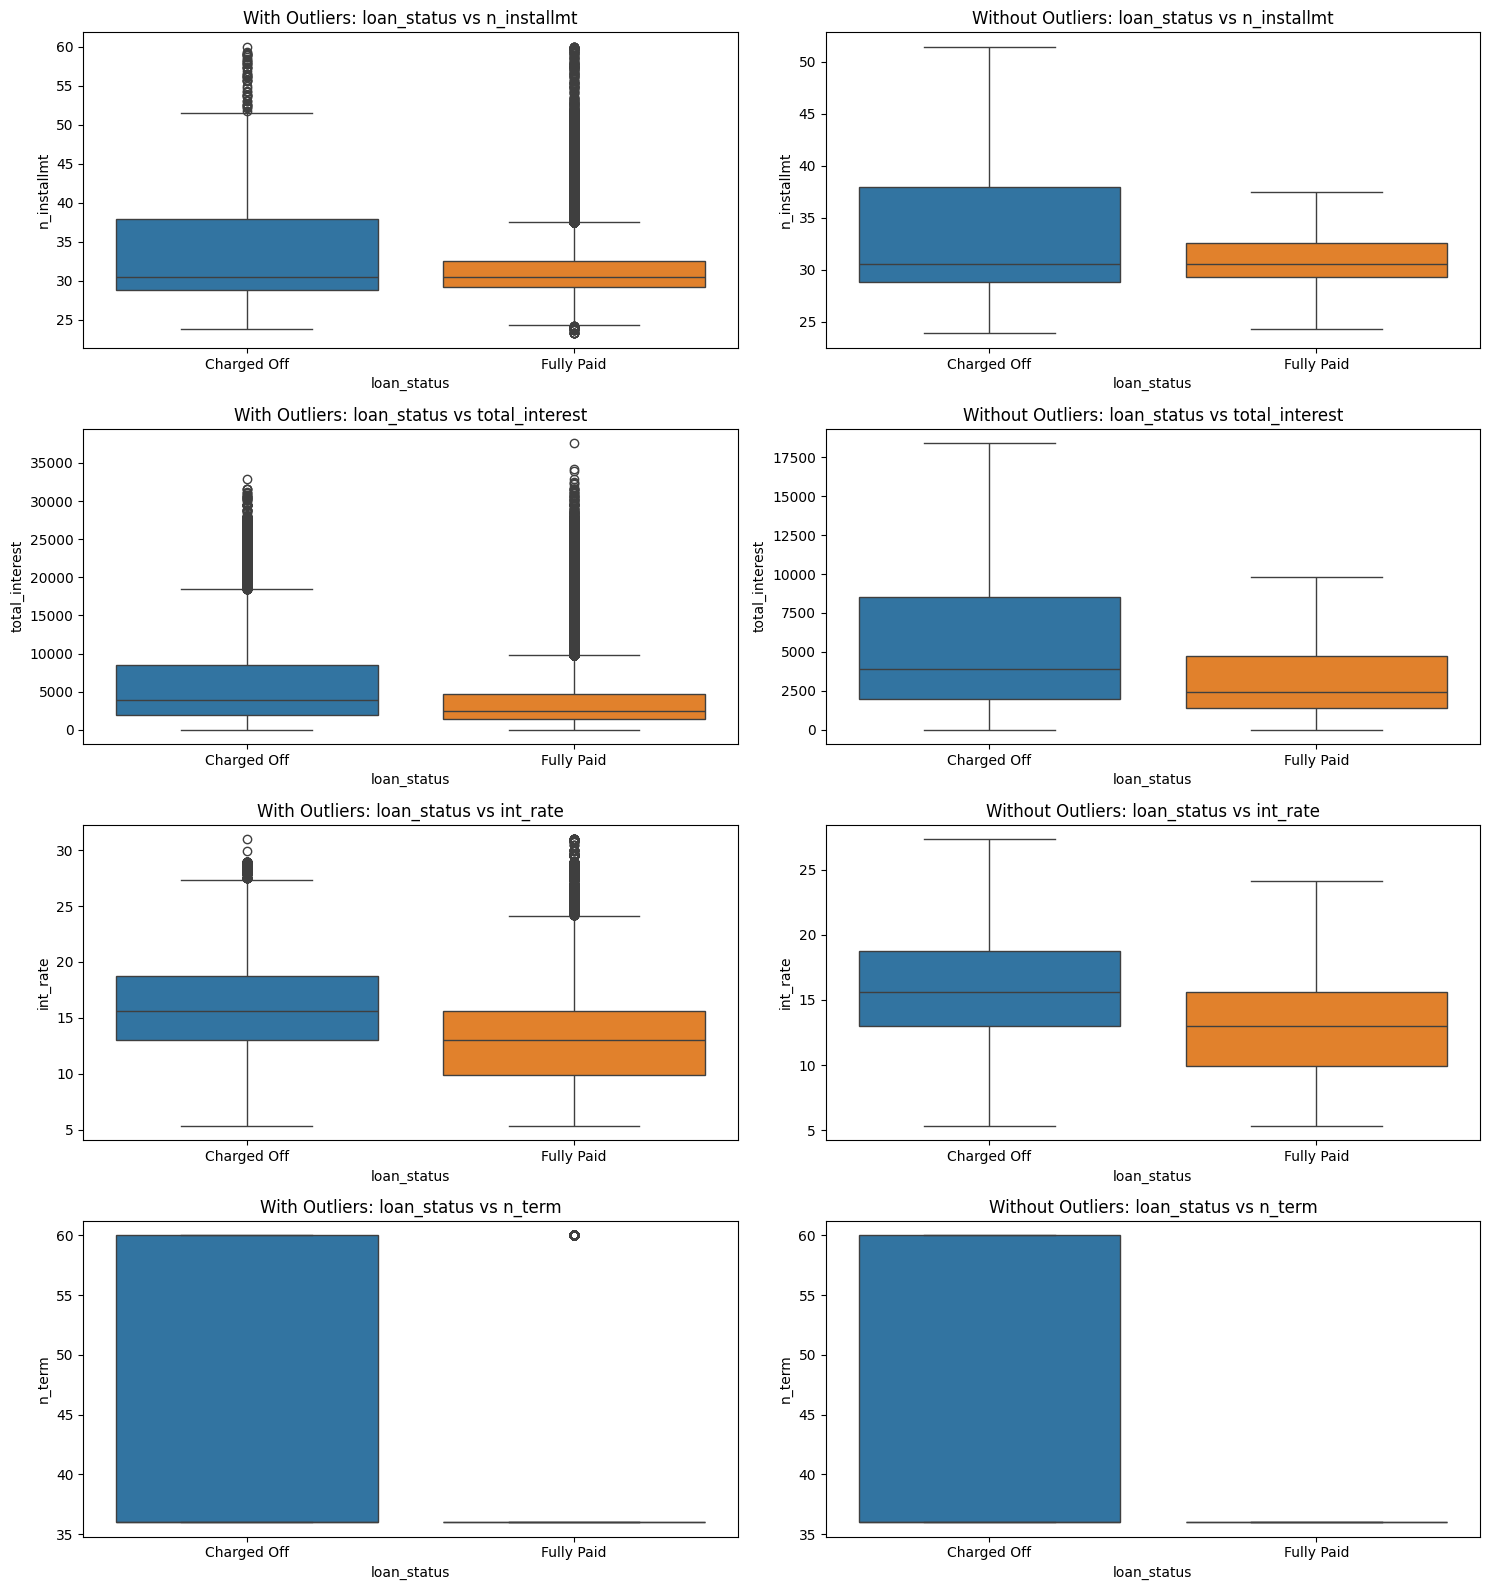

In [20]:
# Define Plot Box Plots for Numerical Variables against Target Variable
def plot_box_plots(df, num_cols, category ='loan_status'):
  num_features = len(num_cols)
  num_rows = num_features  # Calculate the number of rows needed
  fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 4))  # Adjust figure size accordingly
  axes = axes.flatten()

  i = 0  # Initialize index for axes
  for col in df.columns:
      if df[col].dtype == 'object' and col == category:
          for num in num_cols:

              # Plot with outliers
              sns.boxplot(x=col, y=num, data=df, ax=axes[i], hue=col)
              axes[i].set_title(f'With Outliers: {col} vs {num}')
              i += 1

              # Plot without Outliers
              sns.boxplot(x=col, y=num, data=df, ax=axes[i], hue=col, showfliers=False)
              axes[i].set_title(f'Without Outliers: {col} vs {num}')
              i += 1

  # Adjust layout and display
  plt.tight_layout()
  plt.show()

loan_var = ['n_installmt',
            'total_interest', 'int_rate',
            'n_term']
plot_box_plots(data, loan_var, category ='loan_status')

The box plot analysis provides a comparison of different loan variables segmented by the loan status — either `Charged Off` or `Fully Paid`:

1. Number of Installments (`n_installmt`)
- **With Outliers**, the distribution shows a higher range for `Charged Off` loans, suggesting that loans that default typically have higher monthly installment counts, possibly indicating longer loan terms or restructuring attempts before defaulting.

2. Total Interest (`total_interest`)
- **With Outliers**, the distribution shows a higher range for `Charged Off` loans, suggesting that loans that default typically have higher total interest, consistent with higher range of monthly installment counts. The median, however, is significantly higher than that for `Fully Paid` loans, suggesting that many performing loans do not accrue as much interest as those that are riskier.

3. Interest Rate (`int_rate`)
- **With Outliers**, the range and distribution of interest rates for `Charged Off` loans are generally higher, reflecting the increased risk associated with these loans. Outliers in the `Charged Off` category further highlight that extremely high rates are often linked to defaults.

4. Loan Term (`n_term`)
- `Charged Off` loans range across 60 and 36 months term whereas the `Fully Paid` loans typically pay off the loan within 36 months.This could suggest that extending longer loan terms, while potentially reducing monthly payments, might increase the risk of default due to prolonged financial commitment.

### Implications for Risk Management and Lending Strategy
- **Risk Assessment**: Higher interest rates and longer loan terms are clear indicators of increased risk. Lenders might use these insights to adjust their risk assessment models and lending practices.
- **Loan Structuring**: Offering restructuring plans or adjusting the terms of loans showing early signs of potential default could help mitigate losses.

#### Borrower Profiles

#### New Feature: Word2Vec embedding for 'emp_title'

In [21]:
# Count Values for 'emp_title'
data['emp_title'].value_counts()

,count
emp_title,
Teacher,3550
Manager,3395
Registered Nurse,1487
Supervisor,1477
RN,1466
...,...
HID INCORP,1
morgan ohare inc,1
APC Coordinator,1


In [22]:
# Value Count for 'title'
data['title'].value_counts()

,count
title,
Debt consolidation,122052
Credit card refinancing,41151
Home improvement,12242
Other,10326
Debt Consolidation,9188
...,...
A Better Bath,1
Medical/Credit consolidation,1
Kitchen Home Improvement,1


In [23]:
# Value Count for 'purpose'
data['purpose'].value_counts()

,count
purpose,
debt_consolidation,187129
credit_card,66275
home_improvement,19222
other,16890
major_purchase,7015
small_business,4494
car,3735
medical,3347
moving,2258


In [24]:
# Convert 'emp_title' to lower case
data['emp_title_clean'] = data['emp_title'].fillna('others')
data['emp_title_clean'] = data['emp_title_clean'].str.lower()
data['emp_title_clean'] = data['emp_title_clean'].str.replace(r'[^\w\s]', '', regex=True)

In [25]:
# Function to remove duplicated words
def remove_deduplicate(row):
    row = str(row)
    words = row.split()
    unique_words = []
    seen = set()
    for word in words:
        if word not in seen:
            unique_words.append(word)
            seen.add(word)
    return ' '.join(unique_words)

# Concat 'title' and 'purpose' and remove duplicate words
data['title_purpose'] = data['title'] + ' ' + data['purpose']
data['title_purpose'] = data['title_purpose'].str.lower()
data['title_purpose'] = data['title_purpose'].str.replace(r'[^\w\s]', '', regex=True) # only characters and space
data['title_purpose'] = data['title_purpose'].str.replace(r'\b\w{1,2}\b', '', regex=True) # remove words with 1 or 2 characters from a string
data['title_purpose'] = data['title_purpose'].str.replace(r'\s+', ' ', regex=True) # remove multiple spaces
data['title_purpose'] = data['title_purpose'].str.strip() # remove leading and trailing spaces
data['title_purpose'] = data['title_purpose'].str.replace(r'\_', ' ', regex=True) # remove underscores
data['title_purpose'] = data['title_purpose'].fillna('others')
data['title_purpose'] = data['title_purpose'].apply(remove_deduplicate)

In [26]:
data[['emp_title_clean', 'emp_title','title_purpose']].head()

,emp_title_clean,emp_title,title_purpose
id,,,
T0,others,NaN,lendingclub startup loan small business
T1,others,NaN,medical expenses
T2,bus operator,Bus Operator,debt consolidation
T3,business analyst,Business Analyst,debt consolidation
T4,budco,BUDCO,home improvement


In [27]:
from gensim.models import Word2Vec

# Split into individual words for each of 'emp_title_clean' and 'title_purpose'
data['emp_title_vec'] = data['emp_title_clean'].apply(lambda x: x.split())
data['title_purpose_vec'] = data['title_purpose'].apply(lambda x: x.split())


# Prepare data for Word2Vec model
emp_titles_vec = data['emp_title_vec'].tolist()
title_purpose_vec = data['title_purpose_vec'].tolist()

# Train a Word2Vec model for 'emp_title_vec
model = Word2Vec(
    sentences=emp_titles_vec, # Input corpus: list of sentences
    vector_size=100,            # Dimensionality of the word vectors
    window=5,                 # Context window size
    min_count=1,            # Minimum frequency count of words to consider
    workers=4               # Number of worker threads for training
)

model_purpose = Word2Vec(
    sentences=title_purpose_vec, # Input corpus: list of sentences
    vector_size=100,            # Dimensionality of the word vectors
    window=5,                 # Context window size
    min_count=1,            # Minimum frequency count of words to consider
)

# Get the word vectors and calculate the mean vector for each title
def get_mean_vector(words, model):
    # Filter out words that are not in the model's vocabulary
    valid_words = [word for word in words if word in model.wv]
    if not valid_words:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[word] for word in valid_words], axis=0)

# Apply the function to get mean vectors
data['emp_title_vec'] = data['emp_title_vec'].apply(lambda words: get_mean_vector(words, model))
data['title_purpose_vec'] = data['title_purpose_vec'].apply(lambda words: get_mean_vector(words, model_purpose))


In [28]:
# Display the head of the DataFrame with the new vectors
print(data[['emp_title', 'emp_title_vec']].head())

           emp_title                                      emp_title_vec
id                                                                     
T0               NaN  [-0.01095267, 0.0012239201, 0.009404143, 0.010...
T1               NaN  [-0.01095267, 0.0012239201, 0.009404143, 0.010...
T2      Bus Operator  [-0.06378621, 0.1757066, 0.2779339, 0.83584005...
T3  Business Analyst  [-1.2888625, 0.86367804, 0.055576593, 1.329770...
T4             BUDCO  [-0.008017079, -0.009803768, -0.0068844627, 0....


In [29]:
# Display the head of the DataFrame with the new vectors
print(data[['title_purpose', 'title_purpose_vec']].head())

                              title_purpose  \
id                                            
T0  lendingclub startup loan small business   
T1                         medical expenses   
T2                       debt consolidation   
T3                       debt consolidation   
T4                         home improvement   

                                    title_purpose_vec  
id                                                     
T0  [-0.08621397, 0.7598605, -0.2722595, -0.698458...  
T1  [-0.2654841, 0.41935983, 0.1772199, -0.2085456...  
T2  [-0.37743306, 0.58015966, 0.036674105, -0.0059...  
T3  [-0.37743306, 0.58015966, 0.036674105, -0.0059...  
T4  [1.0970674, -0.040251613, 0.6034966, 0.0008484...  


In [30]:
print(f"Length of emp_title vector: {len(data['emp_title_vec'][0])}")
print(f"Length of title_purpose vector: {len(data['title_purpose_vec'][0])}")

Length of emp_title vector: 100
Length of title_purpose vector: 100


<ipython-input-30-036b66008d92>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Length of emp_title vector: {len(data['emp_title_vec'][0])}")
<ipython-input-30-036b66008d92>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Length of title_purpose vector: {len(data['title_purpose_vec'][0])}")


In [31]:
# Convert the 'emp_title_vec' numpy array to a DataFrame
emp_title_vectors = data['emp_title_vec'].apply(pd.Series)
emp_title_vectors= emp_title_vectors.add_prefix('vec_')

In [32]:
# Convert the 'title_purpose_vec' numpy array to a DataFrame
title_purpose_vectors = data['title_purpose_vec'].apply(pd.Series)
title_purpose_vectors= title_purpose_vectors.add_prefix('title_')

Using Word2Vec to analyze borrowers' employment titles and loan purposes in a lending context involves embedding these textual descriptions into numerical vectors. This approach can unveil semantic relationships and patterns that are not immediately obvious from categorical or textual data alone:

1. **Semantic Similarity**:
   - **Rich Feature Extraction**: Word2Vec captures the semantic meaning of words by converting them into vectors. For instance, employment titles like "Manager" and "Supervisor" might be close in the vector space, indicating similar job roles.
   - **Enhanced Loan Analysis**: Similar embeddings for loan purposes like "home improvement" and "houses" suggest overlapping reasons for loan applications, which can be crucial for credit risk assessment and marketing.

2. **Dimensionality Reduction**:
   - Textual data can be verbose and high-dimensional. Word2Vec reduces these texts into a manageable, fixed-size vector, preserving essential information while simplifying the data structure.
   - This transformation aids in integrating textual data with other numerical variables in predictive models, enhancing the model's performance and interpretability.

3. **Improved Predictive Modeling**:
   - **Feature Enrichment**: Embeddings can enrich the feature set used in predictive models by providing insights into borrowers' professions and loan purposes, which are often indicative of their financial behavior and risk profile.
   - **Customization of Products**: Understanding subtle distinctions in employment and loan purposes can help financial institutions tailor their products and services more effectively to meet specific borrower needs.

### Considerations for Using Word2Vec

1. **Quality and Quantity of Data**:
   - **Sufficient Data**: Word2Vec requires a substantial amount of textual data to learn meaningful patterns and relationships. Sparse or limited text data may lead to overfitting or poor generalization of the embeddings.
   - **Preprocessing Needs**: Text data should be cleaned and preprocessed (e.g., tokenization, removal of stop words) to ensure that the model learns from relevant features.

2. **Model Training and Parameters**:
   - **Choosing Parameters**: The choice of parameters like vector size, window size, and min_count (minimum frequency of words) can significantly affect the quality of the learned vectors. These need to be tuned based on specific use cases.
   - **Training Time**: Training Word2Vec models can be computationally intensive, especially with large datasets. It's essential to balance performance with computational efficiency.

3. **Interpretability and Integration**:
   - **Integration with Other Features**: Combining word vectors with other types of data (e.g., numerical, categorical) in machine learning models can be challenging. Care must be taken to ensure that the scale and distribution of the embeddings align with other features.
   - **Interpretability**: While Word2Vec provides powerful features, the embeddings are often hard to interpret directly, which might complicate the explanation of model decisions to stakeholders.

4. **Updating the Model**:
   - **Adapting to Changes**: As new employment titles emerge or loan purposes evolve, the Word2Vec model may need retraining or fine-tuning to accommodate new vocabulary and meanings.

#### Employment Length, home_ownership, verification_status, and credit Age.

In [33]:
# Replace "<1 years" to "0 years" in 'emp_length
data['emp_length'] = data['emp_length'].str.replace('<1 years', '0 years')

# Convert 'emp_length' to integer, fillna with '0'
data['emp_length'] = data['emp_length'].str.extract(r'(\d+)')
data['emp_length'] = data['emp_length'].fillna(0)
data['emp_length'] = data['emp_length'].astype(int)

# For 'home_ownership', group class "ANY", "NONE" into "OTHER"
data['home_ownership'] = data['home_ownership'].replace(['ANY', 'NONE'], 'OTHER')

# For 'verification_status' convert to boolean where "Verified" and "Source Verified" is True
# and "Not Verified" is False
data['verification_status'] = data['verification_status'].map({'Verified':True, 'Source Verified':True, 'Not Verified':False})

In [34]:
# Convert 'issue_d' into upper case and then to datetime type
data['issue_d'] = data['issue_d'].str.upper()
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%Y')

In [35]:
# Convert 'earliest_cr_line' into upper case and then to datetime type
data['earliest_cr_line'] = data['earliest_cr_line'].str.upper()
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')

# Based on 'issued_d' calculate the 'credit_age' by number of years
data['credit_age'] = (data['issue_d'] - data['earliest_cr_line']).dt.days
data['credit_age'] = data['credit_age'] / 365

In [36]:
# New Feature: Total Debt based on 'dti' multiply by 'annual_inc'
data['total_debt'] = data['dti'] * data['annual_inc']


In [37]:
# Fill missing values for 'pub_rec', 'mort_acc' and 'pub_rec_bankruptcies'
data['pub_rec'] = data['pub_rec'].fillna(0)
data['mort_acc'] = data['mort_acc'].fillna(0)
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(0)

#### Imputing Missing Values in 'revol_util'


In [40]:
# Using KNN to impute missing values in 'revol_util'
from sklearn.impute import KNNImputer

# Instantiate the KNN Imputer with 2 nearest neighbors
knn_imputer = KNNImputer(n_neighbors=2)

# Impute the missing values and assign the result to a new column
data['revol_util'] = knn_imputer.fit_transform(data[['revol_util']])


In [41]:
# Number of Missing value in 'revol_util'
print(data['revol_util'].isnull().sum())

0


#### Reviewing Correlation of Borrowers' Features

In [42]:
# List of Features about Borrower
borrower_var = ['emp_length', 'home_ownership', 'verification_status', 'credit_age',
                'total_debt', 'dti', 'open_acc','mort_acc', 'pub_rec', 'pub_rec_bankruptcies', 'total_acc',
                'initial_list_status', 'application_type',
                'revol_bal', 'revol_util']

# Descriptive Statistics
data[borrower_var].describe().T

,count,mean,std,min,25%,50%,75%,max
emp_length,315956.0,5.746651e+00,3.661649,0.0,2.000000,6.000000e+00,1.000000e+01,1.000000e+01
credit_age,315956.0,1.576635e+01,7.204385,3.0,10.926027,1.434521e+01,1.934521e+01,7.021096e+01
total_debt,315956.0,1.199192e+06,791367.577000,0.0,662155.700000,1.046400e+06,1.557750e+06,2.726250e+07
dti,315956.0,1.739332e+01,19.753645,0.0,11.300000,1.691000e+01,2.297000e+01,9.999000e+03
open_acc,315956.0,1.131779e+01,5.138818,0.0,8.000000,1.000000e+01,1.400000e+01,7.600000e+01
mort_acc,315956.0,1.644387e+00,2.110074,0.0,0.000000,1.000000e+00,3.000000e+00,3.400000e+01
pub_rec,315956.0,1.784394e-01,0.514328,0.0,0.000000,0.000000e+00,0.000000e+00,4.000000e+01
pub_rec_bankruptcies,315956.0,1.216498e-01,0.355828,0.0,0.000000,0.000000e+00,0.000000e+00,8.000000e+00
total_acc,315956.0,2.542360e+01,11.888777,2.0,17.000000,2.400000e+01,3.200000e+01,1.510000e+02
revol_bal,315956.0,1.581713e+04,20393.201266,0.0,6029.000000,1.117700e+04,1.959700e+04,1.298783e+06


In [43]:
#from scipy.stats import spearmanr

# Compute Spearman correlations with Target Variable
data_var = ['emp_length', 'home_ownership', 'verification_status', 'credit_age',
                'total_debt', 'dti', 'open_acc','mort_acc', 'pub_rec', 'pub_rec_bankruptcies', 'total_acc',
                'initial_list_status', 'application_type',
                'revol_bal', 'revol_util']

# Test_significance
significance_results = {}

for feature in data_var:
  corr, p_value = spearmanr(data[feature], data['loan_status'])
  significance_results[feature] = {'Correlation': corr, 'Absolute Correlation': abs(corr), 'P-value': p_value, 'Is Correlated': p_value < 0.025} # alpha 5% /2


significance_results_df = pd.DataFrame(significance_results).T
significance_results_df.sort_values(by='Absolute Correlation', ascending=False, inplace=True)
significance_results_df

,Correlation,Absolute Correlation,P-value,Is Correlated
dti,-0.127464,0.127464,0.0,True
verification_status,-0.085431,0.085431,0.0,True
revol_util,-0.081173,0.081173,0.0,True
home_ownership,-0.069567,0.069567,0.0,True
mort_acc,0.061014,0.061014,0.0,True
credit_age,0.03387,0.03387,0.0,True
total_debt,-0.032587,0.032587,0.0,True
emp_length,0.029713,0.029713,0.0,True
open_acc,-0.026359,0.026359,0.0,True
total_acc,0.021822,0.021822,0.0,True


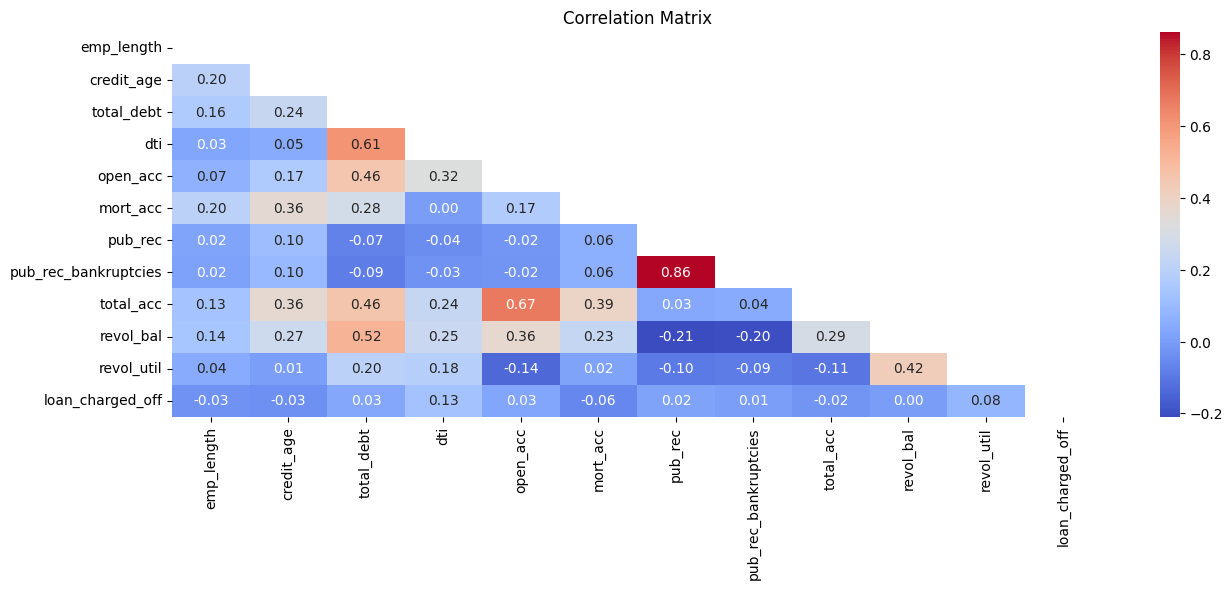

In [44]:
# Plotting Correlation Analysis Heatmaps
# Correlation matrix for loan profile
data_num = data[['emp_length', 'credit_age',
                'total_debt', 'dti', 'open_acc','mort_acc', 'pub_rec', 'pub_rec_bankruptcies', 'total_acc',
                'revol_bal', 'revol_util', 'loan_charged_off']]


plt.figure(figsize=(15, 5))
corr_matrix = data_num.corr(method='spearman')  # Exclude target from correlation matrix calculation

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Correlation Matrix')
plt.show()


#### Box Plot of Borrowers' Numerical Features vs Loan Status

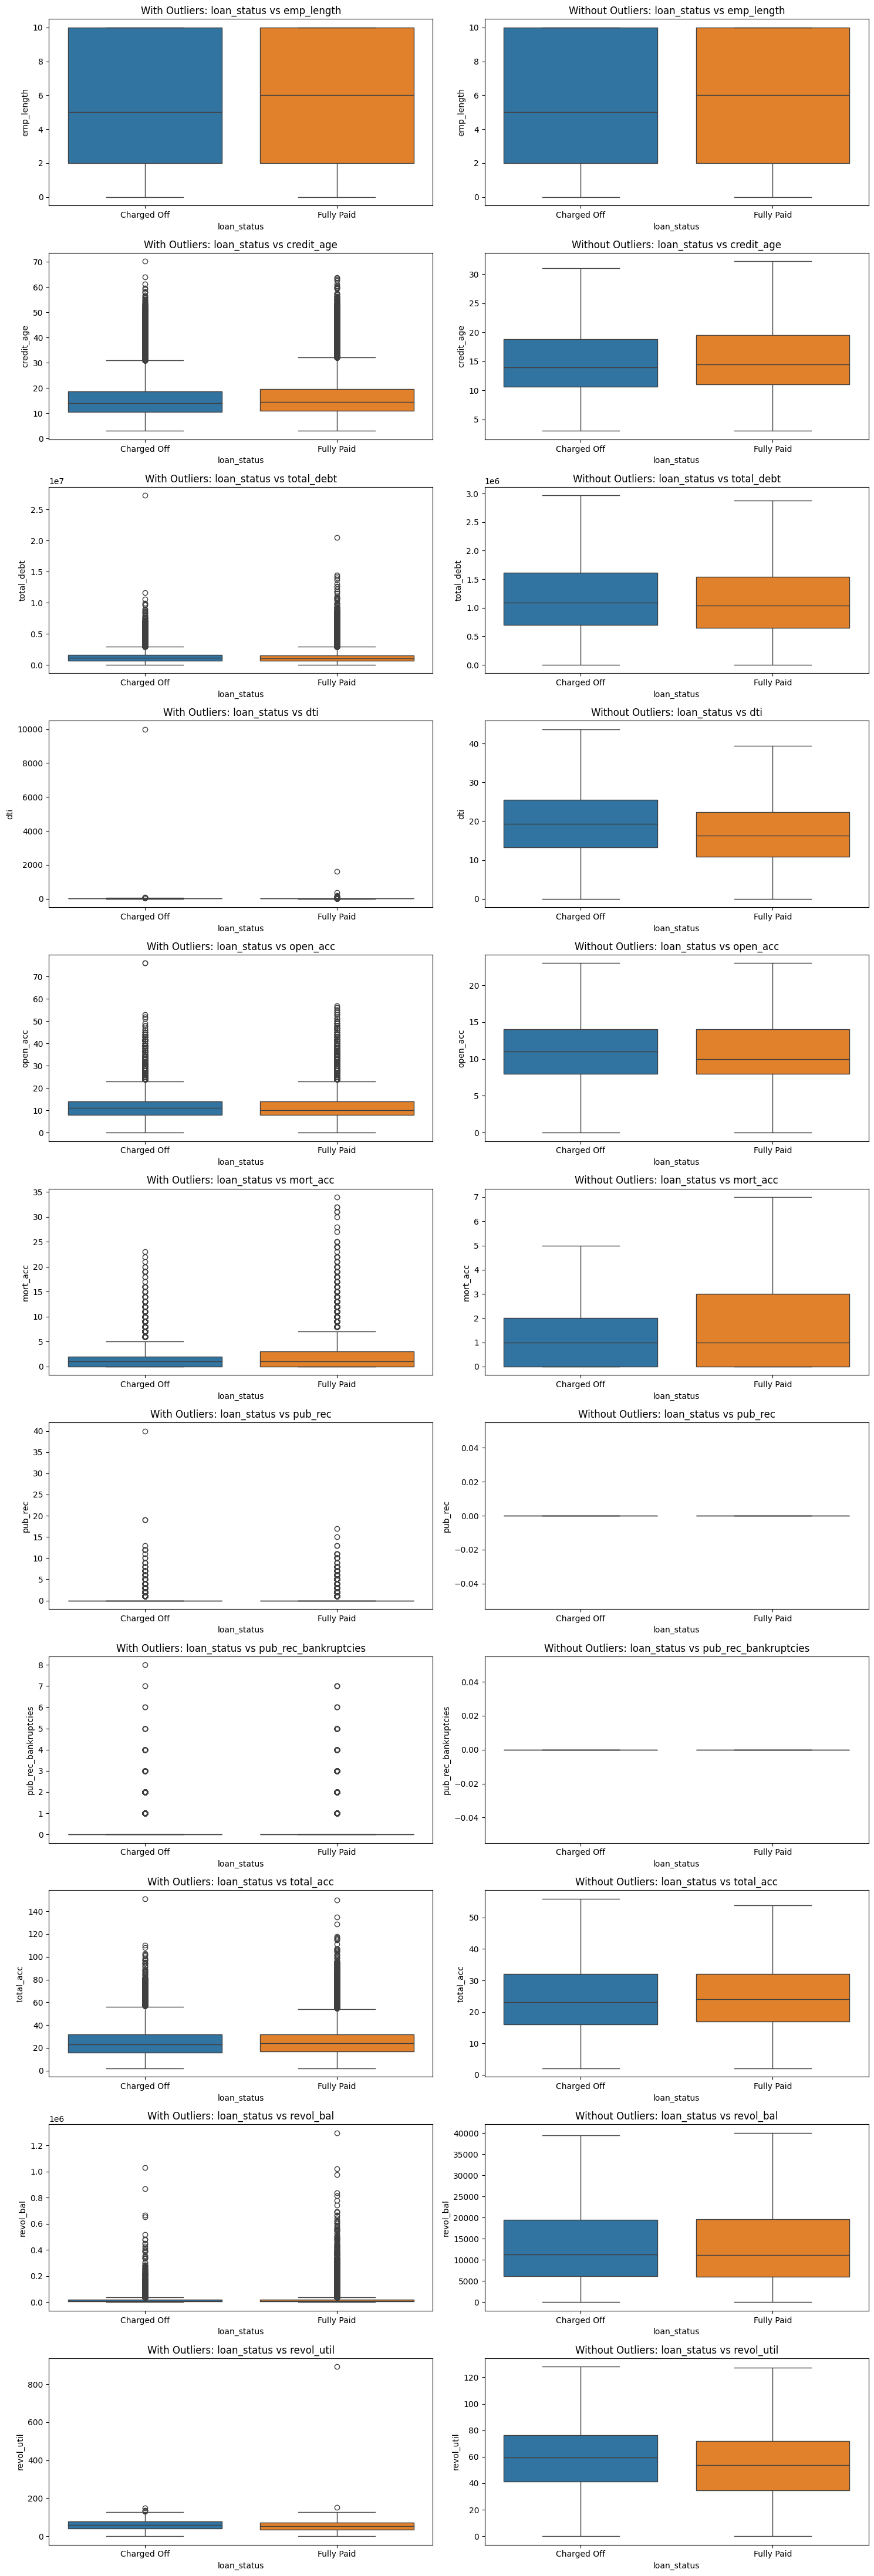

In [45]:
# Define Plot Box Plots for Numerical Variables against Target Variable
def plot_box_plots(df, num_cols, category ='loan_status'):
  num_features = len(num_cols)
  num_rows = num_features  # Calculate the number of rows needed
  fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 4))  # Adjust figure size accordingly
  axes = axes.flatten()

  i = 0  # Initialize index for axes
  for col in df.columns:
      if df[col].dtype == 'object' and col == category:
          for num in num_cols:

              # Plot with outliers
              sns.boxplot(x=col, y=num, data=df, ax=axes[i], hue=col)
              axes[i].set_title(f'With Outliers: {col} vs {num}')
              i += 1

              # Plot without Outliers
              sns.boxplot(x=col, y=num, data=df, ax=axes[i], hue=col, showfliers=False)
              axes[i].set_title(f'Without Outliers: {col} vs {num}')
              i += 1

  # Adjust layout and display
  plt.tight_layout()
  plt.show()

data_var = ['emp_length', 'credit_age',
                'total_debt', 'dti', 'open_acc','mort_acc', 'pub_rec', 'pub_rec_bankruptcies', 'total_acc',
                'revol_bal', 'revol_util']

plot_box_plots(data, data_var, category ='loan_status')

### Key Correlations, Distribution with Loan Status and Their Implications

1. **DTI (Debt-to-Income Ratio) and Loan Charged Off**:
   - **Correlation with Loan Charged Off**: Slightly positive (0.13), suggesting that higher DTI does not strongly predict default. This mild correlation indicates that while DTI is commonly used as heuristic factor for risk assessment, may not be the strongest predictor in isolation.

2. **Public Records and Bankruptcies**:
   - **Correlation between Public Records (`pub_rec`) and Public Record Bankruptcies (`pub_rec_bankruptcies`)**: Very high correlation (0.86), indicating that either of these two variables are redundant.
   - **Correlation with Loan Charged Off**: Both have very low correlations with `loan_charged_off` (0.02 for `pub_rec` and 0.01 for `pub_rec_bankruptcies`), suggesting they are less significant predictors of default than might be expected.

3. **Total Accounts and Open Accounts**:
   - **Correlation between Total Accounts and Open Accounts**: a strong positive correlation of 0.67 indicates that borrowers with many total accounts generally also have many open accounts, which could reflect greater access to or reliance on credit.
   - **Implications**: More accounts might indicate a borrower who is financially active, but not necessarily at higher risk of default as both have very low correlation with `loan_charged_off` (0.03 for `open_acc` and 0.02 for `total_acc`)

4. **Mortgage Accounts (`mort_acc`)**:
   - Moderately strong positive correlations with `credit_age' (0.36), `total_acc` (0.39) and `open_acc` (0.17), suggesting that mortgage accounts are a significant part of many borrowers' credit pictures.

5. **Home Ownership (`home_ownership`)**:
   - Shows a weaker correlation with `loan_charged_off` (-0.07), suggesting that owning a home by itself is not a strong protective factor against loan default.

6. **Revolving Utilization and Revolving Balance**:
   - Moderately positive correlation (0.42), indicating that higher balances on revolving accounts typically come with higher utilization rates.
   - **Loan Outcome**: Lower correlation with `loan_charged_off` (0.08 for `revol_util_knn` and 0.00 for `revol_bal`), suggesting that how much of the available credit is used, and the total balance itself are not strong indicators of default risk.

Analysis of correlation helps in the following:
- **Identifying Multicollinearity**: High correlations like that between `pub_rec` and `pub_rec_bankruptcies` can lead to multicollinearity in predictive models, which can be addressed by potentially removing or combining these variables.
- **Feature Selection**: Identifying which variables have stronger correlations with the outcome can help in selecting the most relevant predictors for model inclusion.
- **Understanding Financial Behaviors**: Interactions between different types of credit accounts can provide insights into borrower behaviors and risk patterns, which can inform risk management strategies.

In [46]:
# Drop datetime type variables no longer required and 'pub_rec_bankruptcies' which is highly correlated with 'pub_rec'
data = data.drop(['issue_d', 'earliest_cr_line', 'pub_rec_bankruptcies'], axis=1)

#### Cleaning and transforming 'address'

In [47]:
# Clean the 'address'
data['address_clean'] = data['address'].str.lower()
data['address_clean'] = data['address_clean'].str.replace(r'[^\w\s]', '', regex=True) # only 5-digit number (postal code), characters and space
data['address_clean'] = data['address_clean'].str.replace(r'\b\w{1,2}\b', '', regex=True) # remove words with 1 or 2 characters
data['address_clean'] = data['address_clean'].str.replace(r'\s+', ' ', regex=True) # remove multiple spaces
data['address_clean'] = data['address_clean'].str.strip() # remove leading and trailing spaces
data['address_clean'] = data['address_clean'].str.replace(r'\_', ' ', regex=True) # remove underscores
data['address_clean'] = data['address_clean'].apply(remove_deduplicate)

In [48]:
data['address_clean'].head()

,address_clean
id,
T0,unit 8329 box 0376 dpo 93700
T1,3275 west club suite 454 kyle 48052
T2,16698 kline unions north patrickfurt 05113
T3,931 kimberly passage suite 749 duncanfurt 00813
T4,657 monroe row suite 128 port courtney 00813


In [49]:
# Find a 5-digit number (postal code) anywhere in the address from end and extract into 'postal_code'
data['postal_code'] = data['address_clean'].str.extract(r'(\d{5})[^0-9]*$', expand=False)
data['postal_code'] = data['postal_code'].str.strip()
data['postal_code'] = data['postal_code'].fillna('unknown')
data['postal_code'].head()

,postal_code
id,
T0,93700
T1,48052
T2,05113
T3,00813
T4,00813


In [50]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Extract only text from 'address_clean'
data['address_text'] = data['address_clean'].str.replace(r'\d+', '', regex=True)
data['address_text'] = data['address_text'].str.replace(r'[^\w\s]', '', regex=True)
data['address_text'] = data['address_text'].str.replace(r'\s+', ' ', regex=True) # remove multiple spaces

# remove stopwords
stop_words = set(stopwords.words('english'))

# add 'unit', 'box' to stop_words
stop_words.update(['unit', 'box', 'row'])

# Clean address_text
data['address_text'] = data['address_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
data['address_text'] = data['address_text'].str.strip() # remove leading and trailing spaces
data['address_text'] = data['address_text'].fillna('')
data['address_text'].head()

,address_text
id,
T0,dpo
T1,west club suite kyle
T2,kline unions north patrickfurt
T3,kimberly passage suite duncanfurt
T4,monroe suite port courtney


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack

# Define batch size
batch_size = 100

# Generator to read data in batches
def read_in_batches(data, batch_size):
    total_rows = data.shape[0]
    for start in range(0, total_rows, batch_size):
        end = min(start + batch_size, total_rows)
        yield data.iloc[start:end]

# Initialize vectorizers
tfidf_vectorizer = TfidfVectorizer()

# Initialize list to store processed batches and their indices
encoded_address_texts = []
indices = []


# Process the remaining batches
for batch in read_in_batches(data, batch_size):
    batch = batch.copy()  # Create a copy of the batch to avoid modifying the original DataFrame
    indices.extend(batch.index.tolist())  # Store the index of the batch as a list

    if not encoded_address_texts:
        address_text_tfidf = tfidf_vectorizer.fit_transform(batch['address_text'])
        encoded_address_texts = [address_text_tfidf]

    else:
        address_text_tfidf = tfidf_vectorizer.transform(batch['address_text'])
        encoded_address_texts.append(address_text_tfidf)

# Combine all the processed batches
all_address_texts = vstack(encoded_address_texts)

# Convert combined address texts to DataFrame
address_df = pd.DataFrame(all_address_texts.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Reassign the indices to the final DataFrame to preseve the indices
address_df.index = indices


print(address_df.head())


    adamport  alec  allenton  amanda  andersonberg  andrewbury  \
T0       0.0   0.0       0.0     0.0           0.0         0.0   
T1       0.0   0.0       0.0     0.0           0.0         0.0   
T2       0.0   0.0       0.0     0.0           0.0         0.0   
T3       0.0   0.0       0.0     0.0           0.0         0.0   
T4       0.0   0.0       0.0     0.0           0.0         0.0   

    andrewschester  annemouth  apo  apt  ...  warren  watson  wendy      west  \
T0             0.0        0.0  0.0  0.0  ...     0.0     0.0    0.0  0.000000   
T1             0.0        0.0  0.0  0.0  ...     0.0     0.0    0.0  0.411492   
T2             0.0        0.0  0.0  0.0  ...     0.0     0.0    0.0  0.000000   
T3             0.0        0.0  0.0  0.0  ...     0.0     0.0    0.0  0.000000   
T4             0.0        0.0  0.0  0.0  ...     0.0     0.0    0.0  0.000000   

    wilcox  williamsfurt  williamshire  williamsonside  willis  zachary  
T0     0.0           0.0           0.0    

In [53]:
# Shape of encoded_data
print(f'Shape of Encoded Address: {address_df.shape}')

print(f'Shape of Loan Status: {data["loan_status"].shape}')
print(f'Shape of Address: {data["address_clean"].shape}')

Shape of Encoded Address: (315956, 258)
Shape of Loan Status: (315956,)
Shape of Address: (315956,)


When dealing with textual data like `address_text` in a dataset, choosing the right technique to convert this text into a usable form for machine learning models is crucial. Two common methods for this purpose are TF-IDF (Term Frequency-Inverse Document Frequency) and Word2Vec are considered:

### TF-IDF
**Advantages**:
- **Simplicity and Interpretability**: TF-IDF is straightforward to understand and implement. It provides a numerical measure of how much a word matters to a document in a collection, which can be easily interpreted. It emphasizes words that are more relevant to the specific context of a document, making it useful for keyword extraction and relevance ranking in textual data.

**Disadvantages**:
- **Lacks Context**: TF-IDF gives a static weight to words without considering the context or order of words, which can miss nuances in text semantics. It does not capture the meaning of words.

### Word2Vec
**Advantages**:
- **Semantic Understanding**: Captures the semantic relationships between words, so similar words have similar encoding. For example, "street" and "road" might be close in the vector space.
- **Efficient for Large Data**: Once trained, Word2Vec can transform new text data into vectors very quickly.

**Disadvantages**:
- **Computational Resources**: Training models can be resource-intensive in terms of computation, especially with very large text corpora.
- **Less Interpretability**: The dimensions of the word vectors are not interpretable, making it hard to understand why certain predictions or classifications are made.

### Application to `address_text`

For `address_text`, which likely includes street names, cities, and perhaps other location identifiers, the choice between TF-IDF and Word2Vec depends on the goal:
- **TF-IDF** could be more suitable if the goal is to highlight specific addresses or components of addresses that are unusual or uniquely identifying within the dataset. It's also simpler and requires less computational power.
- **Word2Vec** might be more beneficial if the analysis benefits from understanding semantic similarities between addresses, such as grouping similar types of locations or understanding patterns in geographical mentions that depend on context.

Choosing between TF-IDF and Word2Vec for handling `address_text` depends significantly on the specific requirements of the analysis or model and the nature of the dataset. If the dataset and resources allow, experimenting with both methods on a subset of the data to compare their effectiveness in meeting the project's objectives can provide practical insights into which method to deploy at scale.

#### Reviewing the Final list of Features

#### Combining the Datasets

In [54]:
# Drop categorical variable no longer required
data2 = data.drop(['term', 'emp_title', 'purpose', 'title', 'grade',
                  'emp_title_clean', 'title_purpose', 'emp_title_vec', 'title_purpose_vec',
                  'address', 'address_clean', 'address_text',
                   'loan_status'], axis=1)

# Convert 'loan_charged_off', 'verification_status' from boolean to numeric
data2['loan_charged_off'] = data2['loan_charged_off'].astype(int)
data2['verification_status'] = data2['verification_status'].astype(int)

print(data2['loan_charged_off'].isnull().sum())

print(data2.info())

0
<class 'pandas.core.frame.DataFrame'>
Index: 315956 entries, T0 to T316823
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   int_rate             315956 non-null  float64
 1   sub_grade            315956 non-null  int64  
 2   emp_length           315956 non-null  int64  
 3   home_ownership       315956 non-null  object 
 4   annual_inc           315956 non-null  float64
 5   verification_status  315956 non-null  int64  
 6   dti                  315956 non-null  float64
 7   open_acc             315956 non-null  float64
 8   pub_rec              315956 non-null  float64
 9   revol_bal            315956 non-null  float64
 10  revol_util           315956 non-null  float64
 11  total_acc            315956 non-null  float64
 12  initial_list_status  315956 non-null  object 
 13  application_type     315956 non-null  object 
 14  mort_acc             315956 non-null  float64
 15  loan_charged_off  

In [55]:
print(address_df.shape)
print(address_df.info())

(315956, 258)
<class 'pandas.core.frame.DataFrame'>
Index: 315956 entries, T0 to T316823
Columns: 258 entries, adamport to zachary
dtypes: float64(258)
memory usage: 624.3+ MB
None


In [56]:
# Concatenate the original data with the encoded postal codes and TF-IDF features
data_df = pd.concat([data2, address_df, emp_title_vectors, title_purpose_vectors], axis=1)
print(data_df.info())
print(data_df.shape)
print(data_df['loan_charged_off'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 315956 entries, T0 to T316823
Columns: 481 entries, int_rate to title_99
dtypes: float32(200), float64(272), int64(5), object(4)
memory usage: 928.9+ MB
None
(315956, 481)
0


In [57]:
print(emp_title_vectors.shape)

(315956, 100)


In [58]:
title_purpose_vectors.shape

(315956, 100)

In [59]:
# Count the number of columns for each data type in data_df
num_cols = data_df.select_dtypes(include=['int64', 'float64']).shape[1]
bool_cols = data_df.select_dtypes(include=['bool']).shape[1]
cat_cols = data_df.select_dtypes(include=['object']).shape[1]

print(f"Number of numerical columns: {num_cols}")
print(f"Number of boolean columns: {bool_cols}")
print(f"Number of categorical columns: {cat_cols}")

Number of numerical columns: 277
Number of boolean columns: 0
Number of categorical columns: 4


In [60]:
cat_cols_list = data_df.select_dtypes(include=['object']).columns.tolist()
print(cat_cols_list)

['home_ownership', 'initial_list_status', 'application_type', 'postal_code']


In [61]:
# Count NaN for all coluns in data_df and print out the list with NaN
for col in data_df.columns:
  if data_df[col].isna().sum() > 0:
    print(f"{col}: {data_df[col].isna().sum()}")

### Features Filtering with Random Forest Algorithm

Using feature importance scores from a Random Forest model is an effective strategy to identify and select the most relevant features for modeling. As Random Forest is non-parametric, it adeptly handles data without requiring the normal distribution assumption for the target variable. This flexibility extends to its ability to manage complex, nonlinear relationships between features and the target, making it highly adaptable to various data types.

Importantly, Random Forest models do not require feature scaling, as their decision-making process is based on the order of data rather than its absolute values. This characteristic simplifies preprocessing steps, reducing the potential for data distortion that can occur with normalization or standardization. However, it's worth noting that while Random Forest can inherently manage categorical variables through splits on these features, practical implementations such as in scikit-learn necessitate converting categorical variables into a numerical format, often through one-hot encoding.

Given these advantages, Random Forest serves as an ideal algorithm for a preliminary approach to feature selection. This method not only helps in improving the efficiency and performance of the model by reducing dimensionality and avoiding overfitting but also significantly decreases training time by focusing on the most impactful features.

In [62]:
# Define a class function to obtain list of features importance with Random Forest

from sklearn.ensemble import RandomForestClassifier

class RandomForestFeatureSelector:
    def __init__(self, X_train, y_train):
        """
        Initializes the RandomForestFeatureSelector.

        :param X_train: Training DataFrame containing features.
        :param y_train: Training DataFrame containing target variable.

        """
        self.X_train = X_train
        self.y_train = y_train
        self.model = None
        self.importances = None
        self.feature_original = {}  # To map encoded names back to original names
        self.features = None  # List of features after preprocessing
        self.feature_importance = None  # DataFrame of feature importance
        self.low_importance = None  # List of features with low importance

    # Function to preprocess the features
    def preprocess_features(self):
        """
        Preprocesses the features by encoding categorical variables using one-hot encoding.
        """
        X = self.X_train
        X_encoded = pd.get_dummies(X, drop_first=True)
        self.features = X_encoded.columns

        # Mapping encoded features back to their original names
        for original_feature in X.columns:
            if X[original_feature].dtype == 'object' or X[original_feature].dtype == 'category':
                encoded_features = [col for col in X_encoded.columns if col.startswith(original_feature + '_')]
                for feature in encoded_features:
                    self.feature_original[feature] = original_feature
            else:
                self.feature_original[original_feature] = original_feature

        return X_encoded


    # Function to fit the RandomForest model
    def fit(self, n_estimators=100, random_state=42):
        """
        Fits the RandomForest model and stores feature importances.
        :param n_estimators: Int, the number of trees in the forest.
        :param random_state: Int, seed used by the random number generator.
        """
        self.n_estimators = n_estimators
        self.random_state = random_state

        X_encoded = self.preprocess_features()
        y = self.y_train
        self.model = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state)
        self.model.fit(X_encoded, y)
        self.importances = self.model.feature_importances_


    # Function to get DataFrame of features with importance
    def df_importance_features(self):
        """
        Returns a DataFrame of features with importance.
        """
        importance_data = {
            "Encoded Feature": self.features,
            "Original Feature": [self.feature_original[f] for f in self.features],
            "Importance": self.importances
        }
        df_importance = pd.DataFrame(importance_data)
        df_importance = df_importance.groupby("Original Feature")['Importance'].sum().reset_index()

        df_importance = df_importance.sort_values(by="Importance", ascending=False).reset_index(drop=True)
        df_importance = df_importance.reset_index(drop=True)

        return df_importance


    # Function to get list of features with low importance
    def low_importance_features(self, threshold=0.01):
        """
        Returns a list of features with low importance.
        :param threshold: Float, the threshold for determining high feature importance.
        """
        self.threshold = threshold

        low_importance = self.df_importance_features()[self.df_importance_features()['Importance'] <= self.threshold]
        low_importance = low_importance.sort_values(by="Importance", ascending=False).reset_index(drop=True)

        if low_importance.empty:
          print(f"No features with low importance based on the threshold <= {self.threshold}.")
        else:
          print(f"Low importance features based on the threshold <= {self.threshold}:")

        return low_importance


    # Function to plot top n_features importance
    def plot_high_importance_features(self, n_features=10):
        """
        Plots the top n_features importance.
        :param n_features: Int, the number of features to select.

        """
        self.n_features = n_features

        high_importance = self.df_importance_features().head(self.n_features)
        if not high_importance.empty:
            plt.figure(figsize=(10, 6))
            sns.set_style('whitegrid')

            sns.barplot(x='Importance', y='Original Feature', data=high_importance)
            plt.xticks(rotation=45, ha='right')
            plt.title(f'Top {self.n_features} High Feature Importance Variables')
            plt.xlabel('Feature Importance')
            plt.ylabel('Features')
            plt.show()

            return high_importance

        else:
            print("No features with high importance.")

# Example usage:
# rf_selector = RandomForestFeatureSelector(X_train, y_train)
# rf_selector.fit()
# print("Low importance features:", rf_selector.low_importance_features())
# rf_selector.plot_high_importance_features(n_features=10)

### Run Random Forest Features Importance Analysis

In [63]:
from sklearn.model_selection import train_test_split

# Separate X and Y sets
X = data_df.drop('loan_charged_off', axis=1)
y = data_df['loan_charged_off']

# Split the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [64]:
# Fit Random Forest Selector
rf_selector = RandomForestFeatureSelector(X_train, y_train)
rf_selector.fit()

In [65]:
# List of Feature Importance
feature_importance = rf_selector.df_importance_features()
feature_importance

,Original Feature,Importance
0,postal_code,0.246270
1,n_installmt,0.022228
2,int_rate,0.021985
3,total_interest,0.020864
4,grade_enc,0.018748
...,...,...
475,jayview,0.000000
476,gilesmouth,0.000000
477,dawsonborough,0.000000
478,calderonmouth,0.000000


In [66]:
# Summarise feature importance Groupby Importance is step of 0.01
feature_importance['importance_group'] = pd.cut(feature_importance['Importance'], bins=np.arange(0, 1.01, 0.01))
importance_grp = feature_importance.groupby('importance_group')['Original Feature'].count()

# Filter where importance group < 0
importance_grp = importance_grp[importance_grp > 0]
print(importance_grp)


importance_group
(0.0, 0.01]     458
(0.01, 0.02]      9
(0.02, 0.03]      3
(0.24, 0.25]      1
Name: Original Feature, dtype: int64


<ipython-input-66-e236f80cf942>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  importance_grp = feature_importance.groupby('importance_group')['Original Feature'].count()


In [67]:
# Filter List of Feature Importance > 0.003
high_importance_features = feature_importance[feature_importance['Importance'] > 0.003]
print(high_importance_features)

    Original Feature  Importance importance_group
0        postal_code    0.246270     (0.24, 0.25]
1        n_installmt    0.022228     (0.02, 0.03]
2           int_rate    0.021985     (0.02, 0.03]
3     total_interest    0.020864     (0.02, 0.03]
4          grade_enc    0.018748     (0.01, 0.02]
..               ...         ...              ...
115           vec_89    0.003516      (0.0, 0.01]
116           vec_41    0.003503      (0.0, 0.01]
117           vec_71    0.003479      (0.0, 0.01]
118           vec_78    0.003473      (0.0, 0.01]
119            vec_7    0.003387      (0.0, 0.01]

[120 rows x 3 columns]


In [68]:
# List of Low Importance Features
low_importance_features = rf_selector.low_importance_features(threshold=0.003)
print(low_importance_features)

Low importance features based on the threshold <= 0.003:
        Original Feature  Importance
0                pub_rec    0.002596
1    verification_status    0.002551
2    initial_list_status    0.002486
3                   lake    0.001999
4                   port    0.001970
..                   ...         ...
355              jayview    0.000000
356           gilesmouth    0.000000
357        dawsonborough    0.000000
358        calderonmouth    0.000000
359           huangburgh    0.000000

[360 rows x 2 columns]


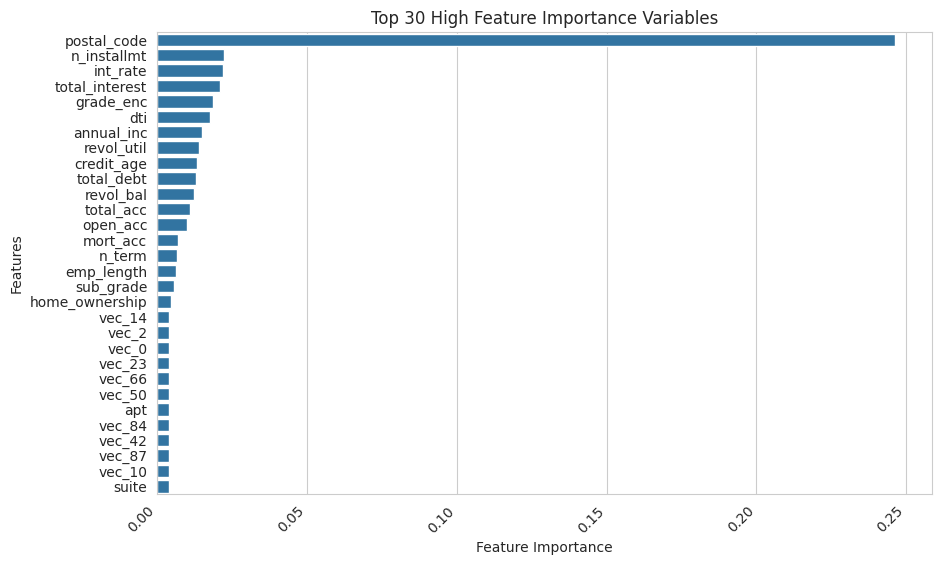

,Original Feature,Importance
0,postal_code,0.246270
1,n_installmt,0.022228
2,int_rate,0.021985
3,total_interest,0.020864
4,grade_enc,0.018748
5,dti,0.017791
6,annual_inc,0.015045
7,revol_util,0.014080
8,credit_age,0.013282
9,total_debt,0.013019


In [69]:
# Plot Top 10 High Importance Features
rf_selector.plot_high_importance_features(n_features=30)

The bar chart displaying the "Top 30 High Feature Importance Variables" derived from a Random Forest model provides insights into which features are most predictive of the loan default or payback:

### Key Insights
1. **Postal Code**: This tops the list, suggesting that geographical location is a significant predictor, potentially due to regional economic conditions or credit culture.
2. ** No. of Installments**: High importance suggesting that longer term and hence higher number of instalments may have higher risk.
3. **Interest Rate (`int_rate`) and Total Interest**: High importance suggesting that the cost of the loan is crucial, with higher rates possibly indicating higher risk.
4. **DTI (Debt-to-Income Ratio)**: As a measure of a borrower's monthly debt payments relative to their income, its significant role highlights the importance of income sufficiency in predicting loan performance.
5. **Word2Vec Embeddings (`vec_#`)**:
  - Several Word2Vec features appear in the list, including `vec_2`, `vec_42`, `vec_84`, etc. These embeddings likely capture subtle semantic nuances of the borrowers' employment and purpose of the loan.
  - The presence of these features with moderate importance scores suggests that the context in which terms are used in the employment titles and loan purposes can provide additional predictive power beyond basic categorical data.
6. **TF-IDF Encodings (`suit`, `apt`)**:
  - keywords from TF-IDF such as `suit` and `apt` also appeared to have some feature importance suggesting that the living conditions of the borrowers may be indicative of their tendency to serve their loan.

# The Next Step....

The exploratory data analysis (EDA) conducted so far has yielded a comprehensive understanding of the dataset's structure, the relevance and impact of various features, and their relationships to each other and the loan outcome. We've identified key features such as postal code, interest rate, total interest, and debt-to-income ratio as significant predictors of loan performance. Additionally, the inclusion of advanced techniques like Word2Vec and TF-IDF to process text data has enhanced our feature set by integrating nuanced semantic insights from employment titles, loan purposes and Address text.

Moving forward, the next steps in the modeling process will include:
1. **Preprocessing Pipeline Development**: Developing a systematic pipeline for cleaning, handling missing values, data transformation and features creation.
2. **Feature Selection**: Leveraging insights from the feature importance analysis to refine the features included in the final models, potentially dropping less informative or redundant features.
3. **Model Development**: Building and tuning predictive models using techniques such as ensemble methods like bagging and boosting to compare their effectiveness.
4. **Model Evaluation**: Assessing model performance using appropriate metrics (e.g., ROC-AUC, precision, recall and F1 Score) and validation techniques like cross-validation.
5. **Model Interpretation and Deployment**: Interpreting the models to understand the driving factors behind predictions and preparing the model for deployment in a production environment or for further testing.

### Project Status

Please include a section that describes what each team member worked on and contributed to the project OR clearly indicate the name of the member for his/her section in the report. This is to make sure team members are carrying a fair share of the work for projects.